# Analyzing hate crimes trends for Austin against the USA as a whole, 2017 - Present

# 1. Data Wrangling

I've been working, off and on, on this project for since about January 2020. One-half practice, one-half because I want to try and contribute to making sense of the chaos that is our world right now. What I intend is to analyze hate crimes trends for Austin, TX against the USA as a whole from 2017 to the present, with particular focus on the LGBT Community. 

I am using data provided by Austin PD in this notebook, and in the next 2, or 3 notebooks as well. For now, I am focusing solely on data for Austin. I will get into broader data for the USA later down the road. 

Also, this notebook will only contain the wrangling phase of the analysis. My next notebook will contain the cleaning process, and so on. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Let's load some data & get to work! I am utilizing data from data.austintexas.gov located in the Austin PD's database on
# reported hatecrimes. 

aus_17 = pd.read_csv('https://data.austintexas.gov/resource/79qh-wdpx.csv', 
                     index_col=0)

display(aus_17.head())

,incident_number,date_of_incident_day_of_week,number_of_vitims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,race_or_ethnic_of_offender,offense,offense_location,bias,victim_type
month,,,,,,,,,,,
January,2017-241137,01/01/2017/Sun,0,1,0,1,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,Individual
February,2017-580344,02/01/2017/Wed,0,1,0,1,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
March,2017-800291,03/21/2017/Tues,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,Other
April,2017-1021534,04/12/2017/Wed,0,0,0,0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,Individual
May,2017-1351550,05/15/2017/Mon,1,0,1,2,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),Individual


## Note & Research Questions

As I stated previously, my goal is to analyze trends over time. In particular, I want to focus on how hate crime affects the LGBT community. Most of these data columns aren't necessary for my analysis so a larger task of the analysis process will be cleaning up the data sets. 

At first glance, I've come up with a few questions for my data: 

    1. What percentage of reported alleged hate crimes is against the LGBT Community? Also, is the trend rising or decreasing? 
        
    2. Does offender age have any correlation to the types of offenses committed? 
    
    3. Does offender race/ethnicity correlate to types of offenses committed? 

In [3]:
# Loading the datasets for '18, '19, and this year
aus_18 = pd.read_csv('https://data.austintexas.gov/resource/idj2-d9th.csv', 
                     index_col=0)
aus_19 = pd.read_csv('https://data.austintexas.gov/resource/e3qf-htd9.csv', 
                     index_col=0)
aus_20 = pd.read_csv('https://data.austintexas.gov/resource/y6x2-kpr9.csv', 
                     index_col=0)

In [4]:
display(aus_18.head())
display(aus_19.head())
display(aus_20.head())

,incident_number,date_of_incident_day_of_week,number_of_vitims_under_18,number_of_victims_over_18,number_of_offenders_under_18,number_of_offenders_over_18,race_ethnic_of_offender_s,offense_s,offense_location,bias,victim_type
month,,,,,,,,,,,
January,2018-251458,01 25 2018/Thur,0,2,0,1,White/NotHispanic,Burglary/Assault,Residence/Home,Anti-Lesbian,Individual
January,2018-200595,01 19 2018/Fri,0,0,0,0,Unknown,Vandalism,Parking Lot/Garage,Anti-Black,Vehicle
February,2018-400447,02 08 2018/Thur,0,1,0,1,White/NotHispanic,Assault,Parking Lot/Garage,Anti-Gay,Individual
February,2018-530804,02 22 2018/Thur,0,1,0,1,White/NotHispanic,Vandalism,Highway/Road/Street,Anti-Black,Individual
March,2018-611809,03 02 2018/Fri,0,1,0,4,Black/Unknown,Assault,Highway/Road/Street,Anti-Hispanic,Individual


,incident_number,date_of_incident,day_of_week,number_of_victims_under_18,number_of_victims_over_18,number_of_offenders_under,number_of_offenders_over,race_ethnicity_of_offenders,offense_s,offense_location,bias,notes
month,,,,,,,,,,,,
January,2019-8000242,2018-12-29T00:00:00.000,Saturday,0,1,0,0,Unknown,Assault,Bar/Nightclub,Anti-Gay (Male),"Offense occurred in 2018, but reported in Janu..."
January,2019-190201,2019-01-19T00:00:00.000,Saturday,0,2,0,4,White/Hispanic (2) White/NonHispanic (2),Assault,Streets/Highway/Road/Alley,Anti-Gay (Male),"Four total offenders, two White Hispanic, two ..."
February,2019-531028,2019-02-22T00:00:00.000,Friday,0,1,0,0,Unknown,Vandalism,Residence/Home,Anti-Jewish,NaN
March,2019-901579,2019-03-31T00:00:00.000,Sunday,0,1,0,1,White/Hispanic,Assault,Bar/Nightclub,Anti-Gay (Male),NaN
April,2019-941819,2019-04-04T00:00:00.000,Saturday,0,1,0,3,White/Hispanic,Assault,School-Elementary/Secondary,Anti-Hispanic/Latino,NaN


,incident_number,date_of_incident,day_of_week,number_of_victims_under_18,number_of_victims_over_18,number_of_offenders_under,number_of_offenders_over,race_ethnicity_of_offenders,offense_s,offense_location,bias,notes
month,,,,,,,,,,,,
March,2020-602085,2020-03-01T00:00:00.000,Sunday,0,1,0,1,White/Non-Hispanic,Criminal Mischief,Residence/Home,Anti-Black,NaN
March,2020-680226,2020-03-08T00:00:00.000,Sunday,0,1,0,2,White/Hispanic,Assault,Parking Lot,Anti-Gay (Male); Anti-Transgender,NaN
March,2020-5011788,2020-03-22T00:00:00.000,Sunday,0,1,0,0,Unknown,Criminal Mischief,Residence/Home,Anti-Gay (Male); Anti-Jewish,NaN
April,2020-5015689,2020-04-20T00:00:00.000,Monday,0,1,0,0,Unknown,Criminal Mischief,Church/Synagogue/Temple/Mosque,Anti-Buddhist,NaN
April,2020-5016804,2020-04-29T00:00:00.000,Wednesday,0,1,0,1,Black/Non-Hispanic,Assault by Threat,Department/Discount Store,Anti-Gay (Male); Anti-Transgender,NaN


Needless to say, these data are quite messy! We'll need to clean & merge these into one df before we can start analyzing. There are several columns in each set we don't need and there are also NaN values.

One brutally glaring problem that really irks me is the 'date' columns are all formatted differently! The 2019 dataset, for ex., has the date column split into 2. This can cause quite a headache later so we'll definitely need to remedy these problems.

Also, I may want to categorize  the different lgbt-related biases into one 'anti-lgbt' to make analyzing easier. 

Before doing so, however, I want to take a look at some variables within the data.

Already, I know that the 'bias' column is going to be a pivotal feature in the analysis. Only the 'offenders' & 'victims' columns are numerical...can't really do much descriptive stats with only that.

LOL! Looks like the creator(s) of the 2017 dataset misspelled vitims[sic] in the first victim column! 

In [5]:
aus_final = pd.concat([aus_17, aus_18, aus_19, aus_20], 
                      axis=0)

print('\n')
display(aus_final)

C:\Users\Robert\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,bias,date_of_incident,date_of_incident_day_of_week,day_of_week,incident_number,notes,number_of_offenders_over,number_of_offenders_over_18,number_of_offenders_under,number_of_offenders_under_18,number_of_victims_over_18,number_of_victims_under_18,number_of_vitims_under_18,offense,offense_location,offense_s,race_ethnic_of_offender_s,race_ethnicity_of_offenders,race_or_ethnic_of_offender,victim_type
month,,,,,,,,,,,,,,,,,,,,
January,Anti-Black or African American,NaN,01/01/2017/Sun,NaN,2017-241137,NaN,NaN,1.0,NaN,0.0,1,NaN,0.0,Aggravated Assault,Park/Playground,NaN,NaN,NaN,White/Not Hispanic,Individual
February,Anti-White,NaN,02/01/2017/Wed,NaN,2017-580344,NaN,NaN,1.0,NaN,0.0,1,NaN,0.0,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,NaN,NaN,NaN,Black or African American/Not Hispanic,Individual
March,Anti-Jewish,NaN,03/21/2017/Tues,NaN,2017-800291,NaN,NaN,0.0,NaN,0.0,0,NaN,0.0,Destruction,Highway/Road/Alley/Street/Sidewalk,NaN,NaN,NaN,Unknown,Other
April,Anti-Jewish,NaN,04/12/2017/Wed,NaN,2017-1021534,NaN,NaN,0.0,NaN,0.0,0,NaN,0.0,Simple Assault,Air/Bus/Train Terminal,NaN,NaN,NaN,White/Unknown,Individual
May,Anti-Gay (Male),NaN,05/15/2017/Mon,NaN,2017-1351550,NaN,NaN,2.0,NaN,1.0,0,NaN,1.0,Simple Assault,Residence/Home,NaN,NaN,NaN,White/Not Hispanic,Individual
June,Anti-Gay (Male),NaN,06/04/2017/Sun,NaN,2017-1550219,NaN,NaN,2.0,NaN,0.0,1,NaN,0.0,Simple Assault,Highway/Road/Alley/Street/Sidewalk,NaN,NaN,NaN,White/Unknown,Individual
June,Anti-Hispanic or Latino,NaN,6/15/2017/Thurs,NaN,2017-1660914,NaN,NaN,1.0,NaN,0.0,1,NaN,0.0,Intimidation,Bank/Savings and Loan,NaN,NaN,NaN,White/Not Hispanic,Individual
June,Anti-Black or African American,NaN,06/17/2017/Sat,NaN,2017-1681488,NaN,NaN,1.0,NaN,0.0,1,NaN,0.0,Simple Assault,Highway/Road/Alley/Street/Sidewalk,NaN,NaN,NaN,White/Not Hispanic,Individual
July,Anti-Black or African American,NaN,07/01/2017/Sat,NaN,2017-1820275,NaN,NaN,1.0,NaN,0.0,1,NaN,0.0,Simple Assault,Highway/Road/Alley/Street/Sidewalk,NaN,NaN,NaN,Group of Multiple Races,Individual


We can discard most of these columns. In fact, I only need the data from bias & another time/datetime column such as month and/or incident_number to measure trends. 

In [6]:
display(aus_final.info())
display(aus_final.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, January to April
Data columns (total 20 columns):
bias                            53 non-null object
date_of_incident                17 non-null object
date_of_incident_day_of_week    36 non-null object
day_of_week                     17 non-null object
incident_number                 53 non-null object
notes                           2 non-null object
number_of_offenders_over        17 non-null float64
number_of_offenders_over_18     36 non-null float64
number_of_offenders_under       17 non-null float64
number_of_offenders_under_18    36 non-null float64
number_of_victims_over_18       53 non-null int64
number_of_victims_under_18      17 non-null float64
number_of_vitims_under_18       36 non-null float64
offense                         17 non-null object
offense_location                53 non-null object
offense_s                       36 non-null object
race_ethnic_of_offender_s       19 non-null object
race_ethnicity_of_offe

None

bias                             0
date_of_incident                36
date_of_incident_day_of_week    17
day_of_week                     36
incident_number                  0
notes                           51
number_of_offenders_over        36
number_of_offenders_over_18     17
number_of_offenders_under       36
number_of_offenders_under_18    17
number_of_victims_over_18        0
number_of_victims_under_18      36
number_of_vitims_under_18       17
offense                         36
offense_location                 0
offense_s                       17
race_ethnic_of_offender_s       34
race_ethnicity_of_offenders     36
race_or_ethnic_of_offender      36
victim_type                     17
dtype: int64

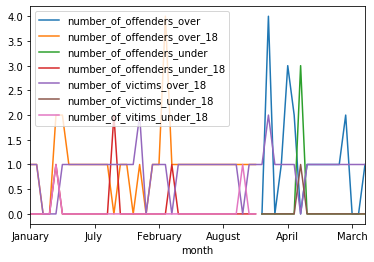

In [7]:
# I'm almost too scared to try but let's see what we get with a raw visual
aus_final.plot()

<iframe src="https://giphy.com/embed/3oriNLnYCrAj1Rg7qE" width="480" height="268" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/snl-saturday-night-live-snl-2016-3oriNLnYCrAj1Rg7qE">via GIPHY</a></p>

Kinda pretty actually, but yeah...not gonna cut it!

So the good thing is the 'bias' column of each set is formatted the same so that is at least one blessing we can count.

Accordingly, we should be able to go ahead & concatenate into one df & then we can begin cleaning everything up.

In [8]:
# Saving the data to come back to after I've nursed this headache :( )
aus_final.to_csv(r"C:\Users\Robert\OneDrive\Desktop\aus_final.csv")